### Finding Correlation

##### Install and Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the Dataset

In [ ]:
file_path = r'D:\New folder (4)\Coursera\DA Capstone\cleaned_survey_data2.csv'

dfo = pd.read_csv(file_path)

dfo.head()    # Display the first five rows

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange,Language
0,0,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,JavaScript
1,1,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,Python
2,2,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,Ruby
3,3,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,...,0.0,20.0,10.0,10.0,Appropriate in length,Easy,66616.0,8.0,10-20,Bash/Shell (all shells)
4,4,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,...,0.0,20.0,10.0,10.0,Appropriate in length,Easy,66616.0,8.0,10-20,C#


In [3]:
df = dfo.copy()

##### Analyze and Visualize Compensation Distribution

Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.

In [4]:
# Basic Statistis

print(df['ConvertedCompYearly'].describe())

count    1.570770e+05
mean     7.752111e+04
std      1.283562e+05
min      1.000000e+00
25%      6.107100e+04
50%      6.661600e+04
75%      7.384200e+04
max      1.381802e+07
Name: ConvertedCompYearly, dtype: float64


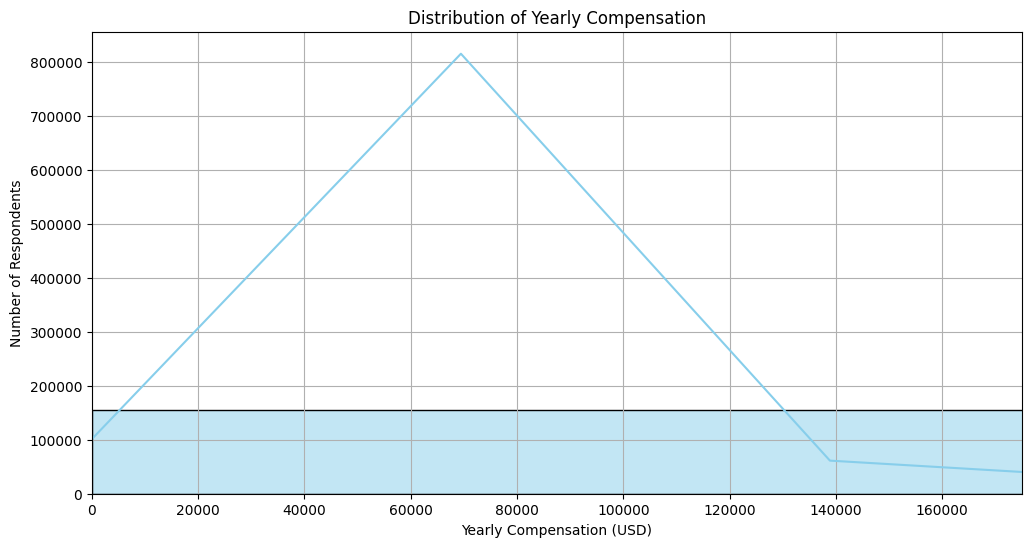

In [5]:
# Plot Histogram & Distribution

plt.figure(figsize=(12,6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.xlim(0, df['ConvertedCompYearly'].quantile(0.95))  # Optional: zoom in to remove extreme outliers
plt.grid(True)
plt.show()

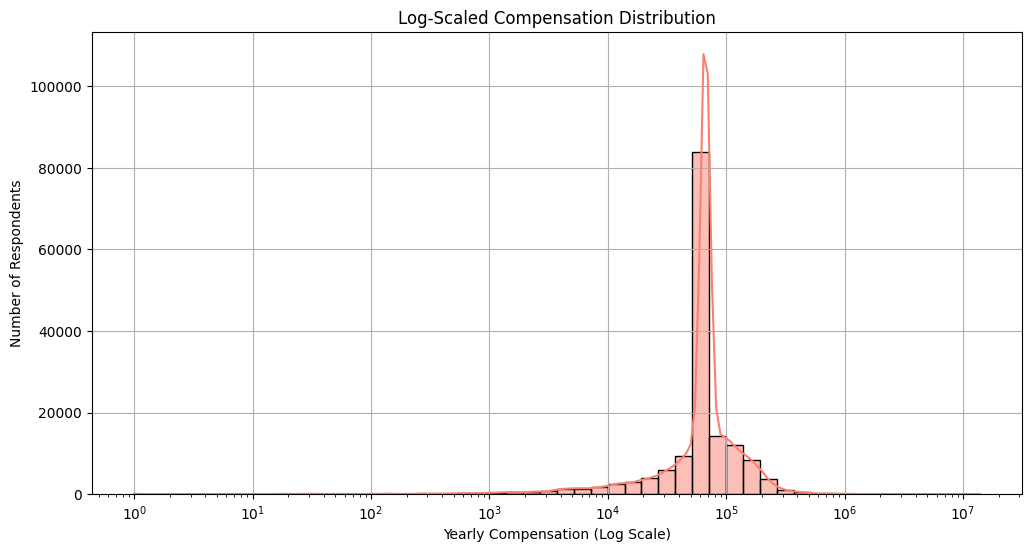

In [6]:
# Log-Scaled Histogram (to reduce skewness)

plt.figure(figsize=(12,6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, log_scale=(True, False), color='salmon')
plt.title('Log-Scaled Compensation Distribution')
plt.xlabel('Yearly Compensation (Log Scale)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


##### Calculate Median Compensation for Full-Time Employees

Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."

In [7]:
# Filter for full-time employees
full_time = df[df['Employment'] == 'Employed, full-time']

# Calculate median of ConvertedCompYearly
median_full_time_comp = full_time['ConvertedCompYearly'].median()

print(f"Median Yearly Compensation (Full-Time): ${median_full_time_comp:,.2f}")


Median Yearly Compensation (Full-Time): $66,616.00


##### Analyzing Compensation Range and Distribution by Country

Explore the range of compensation in the `ConvertedCompYearly` column by analyzing differences across countries.     
Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.

In [8]:
# Filter valid compensation data

df_comp = df[['Country', 'ConvertedCompYearly']].dropna()

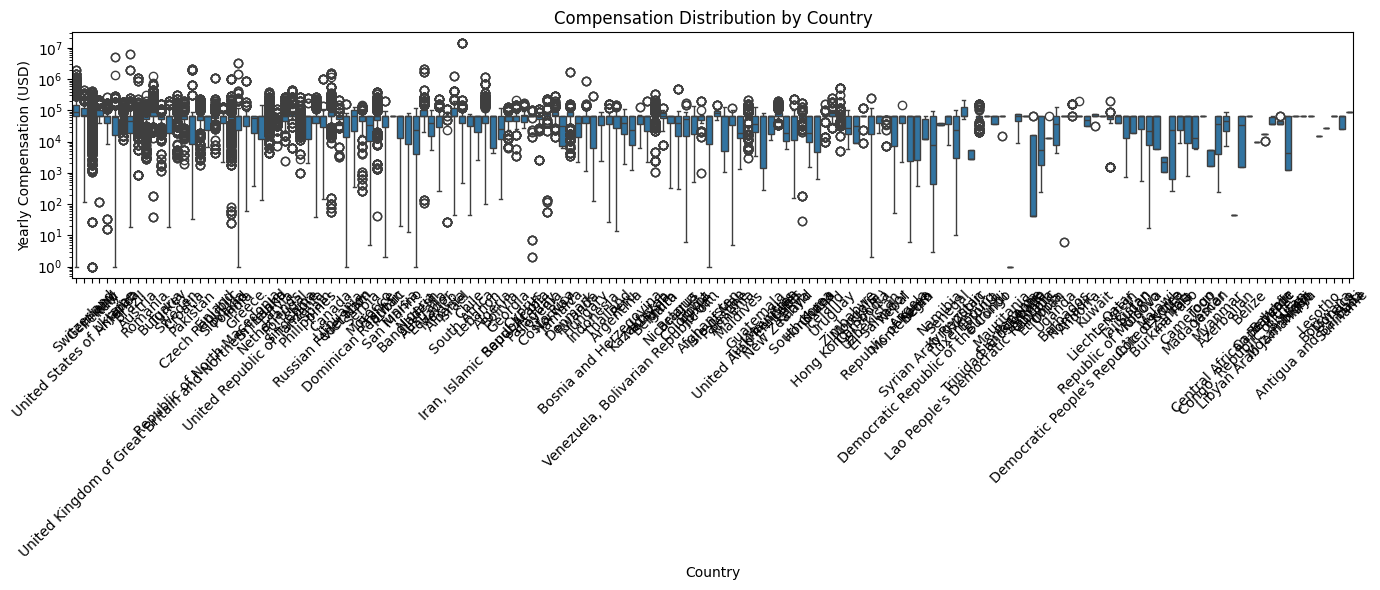

In [9]:
# Create box plot by Country

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_comp, x='Country', y='ConvertedCompYearly')
plt.title('Compensation Distribution by Country')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.yscale('log')  # Optional: log scale to handle large outliers
plt.tight_layout()
plt.show()


In [10]:
df['Country'].value_counts()

Country
United States of America                                31471
Germany                                                 14374
India                                                    9691
United Kingdom of Great Britain and Northern Ireland     8609
Canada                                                   5522
                                                        ...  
Libyan Arab Jamahiriya                                      4
Central African Republic                                    4
Sierra Leone                                                4
Fiji                                                        2
Burundi                                                     1
Name: count, Length: 166, dtype: int64

In [11]:
df['Country'].nunique()

166

In [12]:
# filter top countries for readability

top_countries = df_comp['Country'].value_counts().head(50).index
df_top = df_comp[df_comp['Country'].isin(top_countries)]

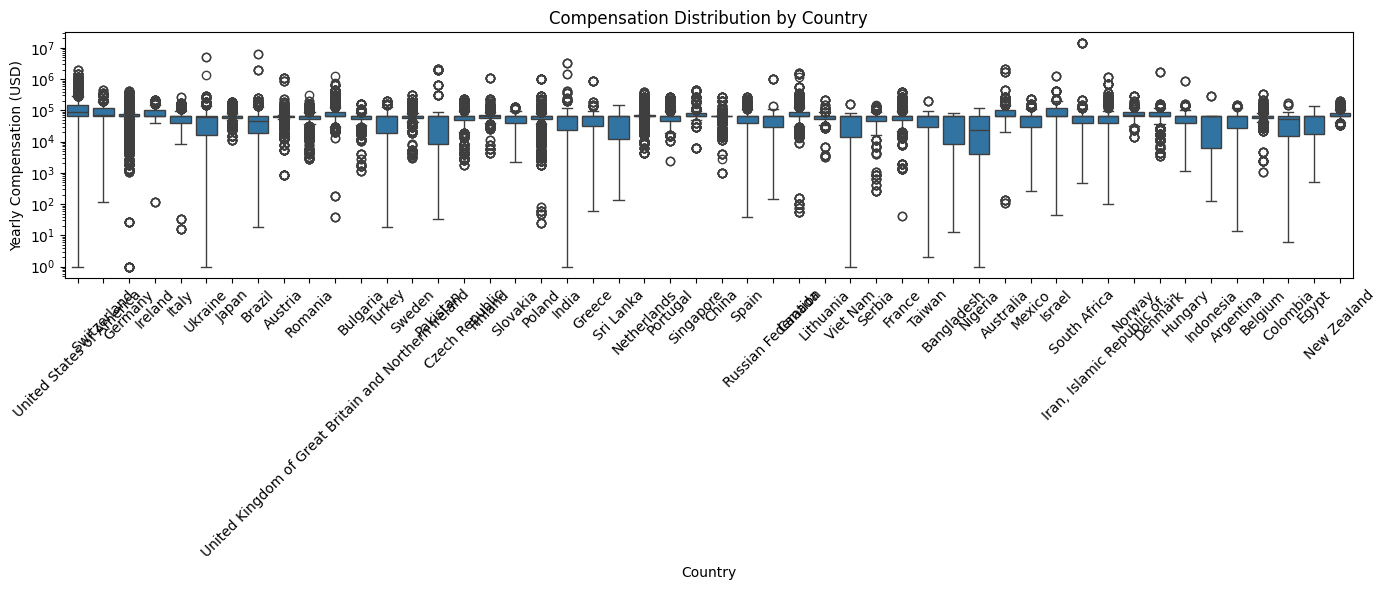

In [13]:
# Create box plot by Country

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='Country', y='ConvertedCompYearly')
plt.title('Compensation Distribution by Country')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.yscale('log')  # Optional: log scale to handle large outliers
plt.tight_layout()
plt.show()

In [14]:
# TODO: Write Interpretation

##### Removing Outliers from the Dataset

Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.

In [15]:
# Calculate IQR and Bounds for Outliers

Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Filter Out Outliers

# Already using a new df so not creating another
df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate Size
print(f"Original dataset size: {dfo.shape[0]}")
print(f"New dataset size without outliers: {df.shape[0]}")

Original dataset size: 157077
New dataset size without outliers: 101964


In [34]:
def remove_outliers_iqr(df):
    """
    Removes rows from the DataFrame where any numeric column has a value outside the IQR bounds.
    """
    df_clean = df.copy()
    numeric_cols = df_clean.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

In [35]:
df_no_outliers = remove_outliers_iqr(df)
print("Original shape:", df.shape)
print("After outlier removal:", df_no_outliers.shape)

Original shape: (101964, 115)
After outlier removal: (29626, 115)


##### Finding Correlations Between Key Variables

Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`.     
Visualize these correlations with a heatmap.

In [36]:
corr_df = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

In [37]:
# Check for Null Values
corr_df.isnull().sum()

ConvertedCompYearly    0
WorkExp                0
JobSatPoints_1         0
dtype: int64

In [38]:
# Calculate Correlation Matrix
correlation_matrix = corr_df.corr(method='spearman')  # Using 'spearman' since data is not normally distributed
print(correlation_matrix)

                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.092282        0.016625
WorkExp                         0.092282  1.000000        0.060307
JobSatPoints_1                  0.016625  0.060307        1.000000


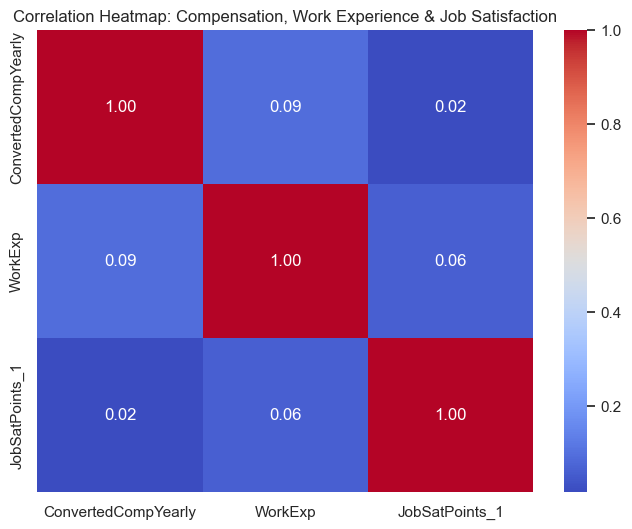

In [39]:
# Visualize with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Compensation, Work Experience & Job Satisfaction')
plt.show()

| Variable Pair                            | Spearman ρ (rho) | Interpretation                     |
| ---------------------------------------- | ---------------- | ---------------------------------- |
| `ConvertedCompYearly` ↔ `WorkExp`        | **0.092**        | **Very weak positive** correlation |
| `ConvertedCompYearly` ↔ `JobSatPoints_1` | **0.017**        | **No significant** correlation     |
| `WorkExp` ↔ `JobSatPoints_1`             | **0.060**        | **Very weak positive** correlation |


* Compensation slightly increases with experience, but the correlation is very weak.

* Job satisfaction appears largely independent of compensation and experience.

* Spearman correlation (non-parametric) is used here — good choice if the data isn't normally distributed or has outliers.

##### Scatter Plot for Correlations

Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.

In [40]:
# Set style
sns.set(style="whitegrid")


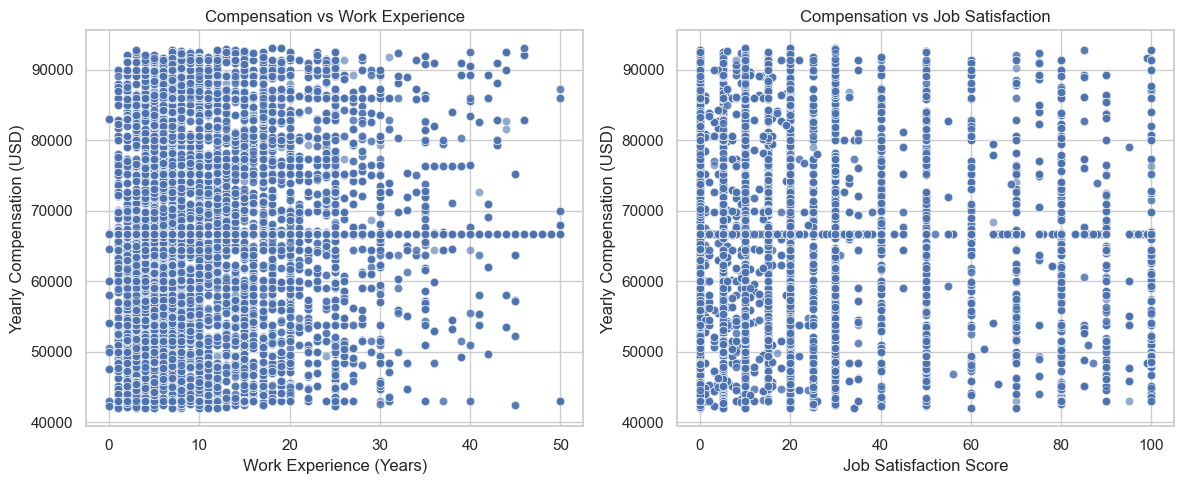

In [41]:
# Scatter plot: Compensation vs. Work Experience

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='WorkExp', y='ConvertedCompYearly', alpha=0.6)
plt.title('Compensation vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')


# Scatter plot: Compensation vs Job Satisfaction

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.6)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation (USD)')

plt.tight_layout()
plt.show()